In [ ]:
# ============================================
# Carregamento e Consolidação dos Dados
# ============================================

import pandas as pd
import os
from google.colab import drive

# Montar o Google Drive
drive.mount('/content/drive')

# Caminho da pasta
caminho_pasta = "/content/drive/MyDrive/beijing_air_quality"

# Listar todos os arquivos CSV da pasta
arquivos_csv = [f for f in os.listdir(caminho_pasta) if f.endswith('.csv')]

print(f"Arquivos encontrados: {arquivos_csv}")
print(f"Total de arquivos: {len(arquivos_csv)}")

# Criar lista para armazenar DataFrames
lista_dfs = []

# Ler cada arquivo e adicionar à lista
for arquivo in arquivos_csv:
    caminho_completo = os.path.join(caminho_pasta, arquivo)
    df_temp = pd.read_csv(caminho_completo)

    # Criar coluna com nome da estação (caso queira garantir identificação)
    df_temp["station_file"] = arquivo.replace(".csv", "")

    lista_dfs.append(df_temp)

# Concatenar todos em um único DataFrame
df = pd.concat(lista_dfs, ignore_index=True)

# Conferências finais
print("\nDimensão final do dataset:", df.shape)
print("Número de estações identificadas:", df["station_file"].nunique())

df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Arquivos encontrados: ['PRSA_Data_Aotizhongxin_20130301-20170228.csv', 'PRSA_Data_Changping_20130301-20170228.csv', 'PRSA_Data_Dingling_20130301-20170228.csv', 'PRSA_Data_Dongsi_20130301-20170228.csv', 'PRSA_Data_Guanyuan_20130301-20170228.csv', 'PRSA_Data_Gucheng_20130301-20170228.csv', 'PRSA_Data_Huairou_20130301-20170228.csv', 'PRSA_Data_Nongzhanguan_20130301-20170228.csv', 'PRSA_Data_Shunyi_20130301-20170228.csv', 'PRSA_Data_Tiantan_20130301-20170228.csv', 'PRSA_Data_Wanliu_20130301-20170228.csv', 'PRSA_Data_Wanshouxigong_20130301-20170228.csv']
Total de arquivos: 12

Dimensão final do dataset: (420768, 19)
Número de estações identificadas: 12


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,station_file
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,PRSA_Data_Aotizhongxin_20130301-20170228
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,PRSA_Data_Aotizhongxin_20130301-20170228
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,PRSA_Data_Aotizhongxin_20130301-20170228
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,PRSA_Data_Aotizhongxin_20130301-20170228
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,PRSA_Data_Aotizhongxin_20130301-20170228


In [ ]:
# Preparação de limpeza dos dados
# Criar coluna datetime
df["datetime"] = pd.to_datetime(
    df[["year", "month", "day", "hour"]]
)

# Ordenar por tempo
df = df.sort_values("datetime")

# Verificar valores faltantes (%)
missing_percent = df.isnull().mean() * 100
print("Percentual de valores faltantes:\n")
print(missing_percent.sort_values(ascending=False))

Percentual de valores faltantes:

CO              4.919813
O3              3.155421
NO2             2.879497
SO2             2.143937
PM2.5           2.076916
PM10            1.532674
wd              0.433018
DEWP            0.095777
TEMP            0.094589
PRES            0.093401
RAIN            0.092688
WSPM            0.075576
day             0.000000
month           0.000000
year            0.000000
No              0.000000
hour            0.000000
station         0.000000
station_file    0.000000
datetime        0.000000
dtype: float64


In [ ]:
# Interpolação (sem remover linhas)
# Interpolação linear para manter coerência temporal
df = df.interpolate(method="linear")

# Preencher possíveis NAs no início/fim
df = df.fillna(method="bfill").fillna(method="ffill")

print("\nValores faltantes após tratamento:\n")
print(df.isnull().sum().sum())

/tmp/ipython-input-2262186075.py:3: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df = df.interpolate(method="linear")
/tmp/ipython-input-2262186075.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method="bfill").fillna(method="ffill")



Valores faltantes após tratamento:

0


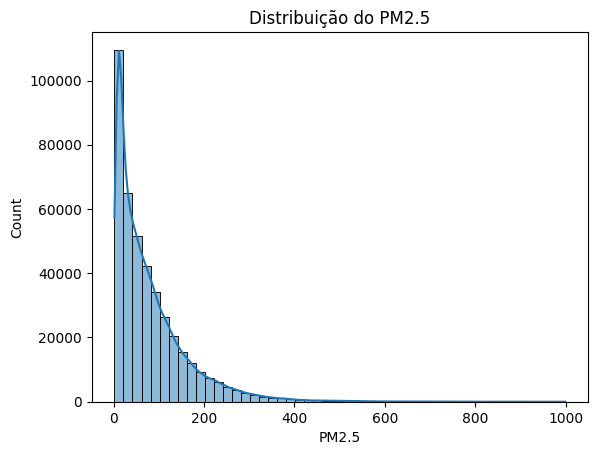

Skewness: 2.020293255412701


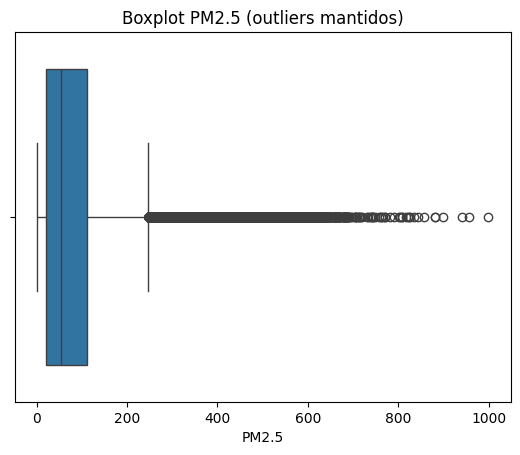

In [ ]:
# ============================================
# Análise Exploratória do PM2.5
# ============================================
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Distribuição original
sns.histplot(df["PM2.5"], bins=50, kde=True)
plt.title("Distribuição do PM2.5")
plt.show()

print("Skewness:", df["PM2.5"].skew())

# Boxplot(sem remover outliers)
sns.boxplot(x=df["PM2.5"])
plt.title("Boxplot PM2.5 (outliers mantidos)")
plt.show()

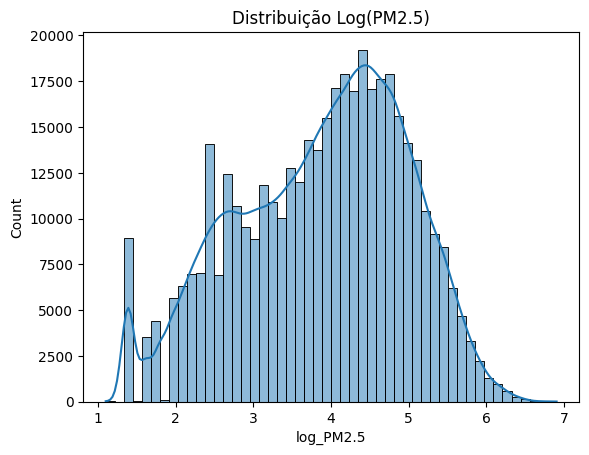

Nova skewness: -0.3121753279745473


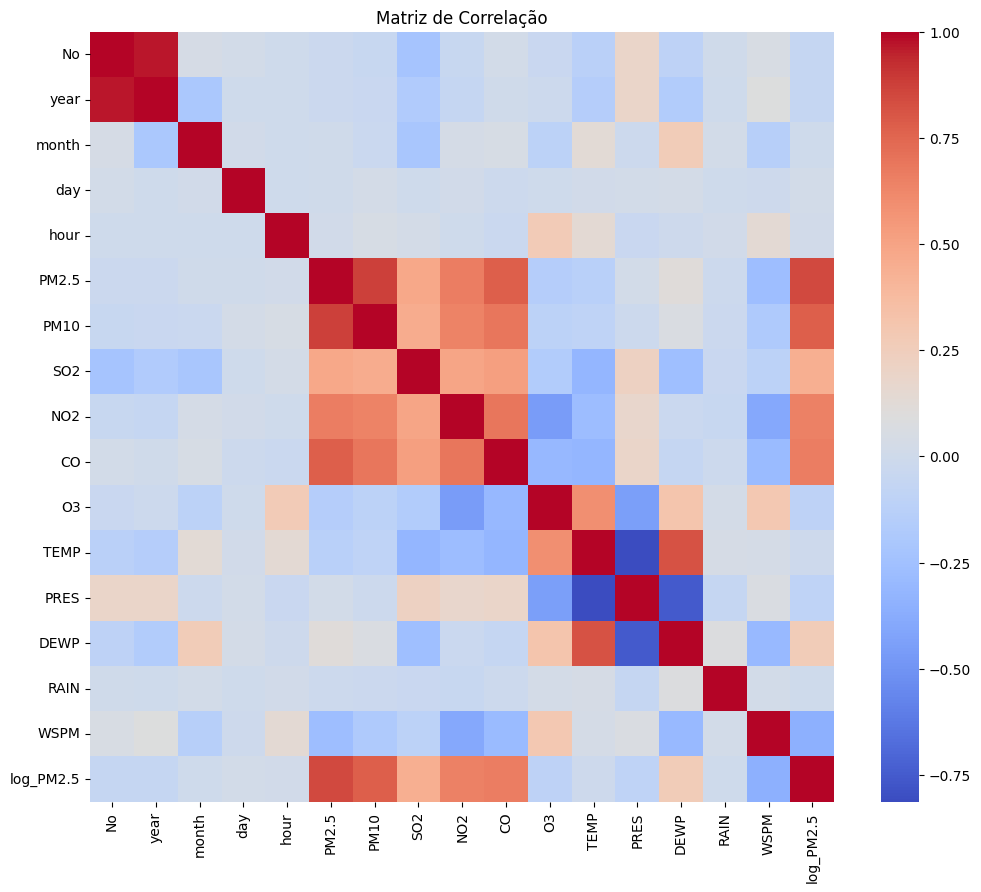

In [ ]:
# ===========================================
# Transformação Log (para lidar com extremos)
# ===========================================
df["log_PM2.5"] = np.log1p(df["PM2.5"])

sns.histplot(df["log_PM2.5"], bins=50, kde=True)
plt.title("Distribuição Log(PM2.5)")
plt.show()

print("Nova skewness:", df["log_PM2.5"].skew())

# ============================================
# Matriz de Correlação
# ============================================
plt.figure(figsize=(12,10))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, cmap="coolwarm")
plt.title("Matriz de Correlação")
plt.show()

In [ ]:
# Definição das Variáveis
features = ["TEMP", "PRES", "DEWP", "WSPM",
            "NO2", "SO2", "CO", "O3"]

X = df[features]
y = df["log_PM2.5"]

# Divisão Treino/Teste
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Ajuste do Modelo (OLS)
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_sm).fit()

print(model.summary())

# Avaliação do Modelo
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X_test_sm = sm.add_constant(X_test)
y_pred = model.predict(X_test_sm)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("MAE:", mae)
print("R²:", r2)

                            OLS Regression Results                            
Dep. Variable:              log_PM2.5   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                 7.735e+04
Date:                Sun, 22 Feb 2026   Prob (F-statistic):               0.00
Time:                        22:11:32   Log-Likelihood:            -3.3178e+05
No. Observations:              336614   AIC:                         6.636e+05
Df Residuals:                  336605   BIC:                         6.637e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.6153      0.194     39.310      0.0

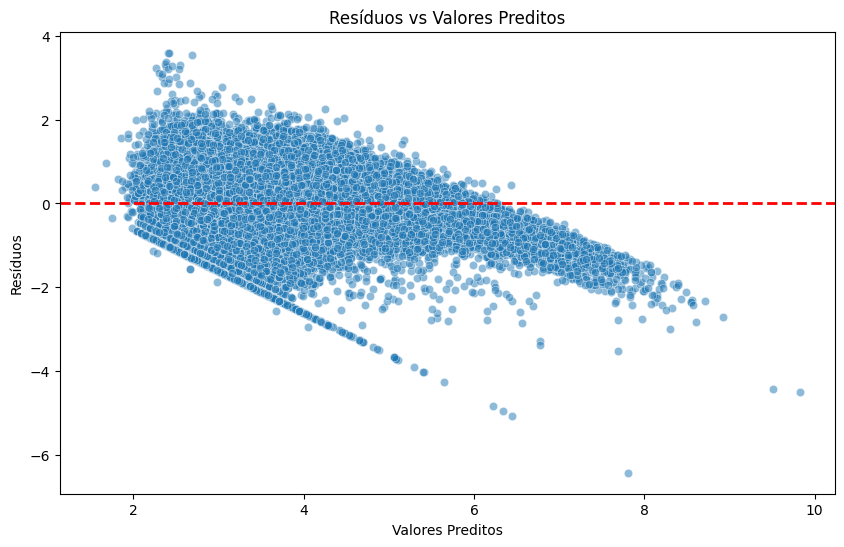

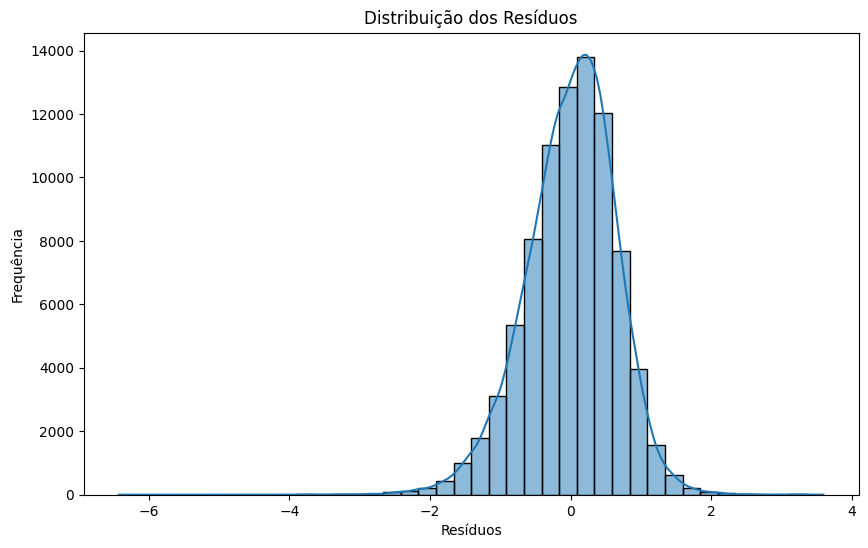

Breusch-Pagan p-value: 0.0
Durbin-Watson: 1.9872744339999633


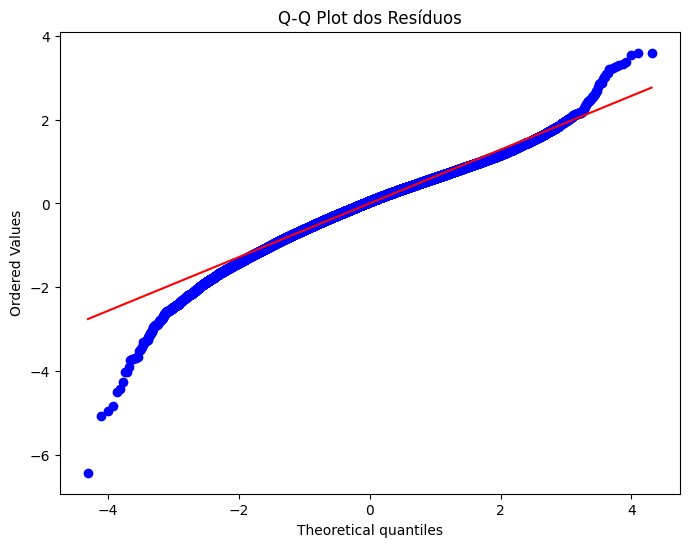

In [ ]:
# ============================================
# Análise dos Resíduos
# ============================================
residuals = y_test - y_pred

# Resíduos vs Valores Preditos
# Garantindo que tudo vire array
y_test_array = np.array(y_test).ravel()
y_pred_array = np.array(y_pred).ravel()

# Calculando resíduos
residuals = y_test_array - y_pred_array

plt.figure(figsize=(10,6))

sns.scatterplot(
    x=y_pred_array,
    y=residuals,
    alpha=0.5
)

plt.axhline(0, color='red', linestyle='--', linewidth=2)

plt.xlabel("Valores Preditos")
plt.ylabel("Resíduos")
plt.title("Resíduos vs Valores Preditos")

plt.show()

# Normalidade dos Resíduos
plt.figure(figsize=(10,6))

sns.histplot(residuals, kde=True, bins=40)

plt.title("Distribuição dos Resíduos")
plt.xlabel("Resíduos")
plt.ylabel("Frequência")
plt.show()

# Heterodasticidade
from statsmodels.stats.diagnostic import het_breuschpagan

bp_test = het_breuschpagan(residuals, X_test_sm)
print("Breusch-Pagan p-value:", bp_test[1])

# Autocorrelação
from statsmodels.stats.stattools import durbin_watson

dw = durbin_watson(residuals)
print("Durbin-Watson:", dw)

# Q-Q Plot
import scipy.stats as stats

plt.figure(figsize=(8,6))
stats.probplot(residuals, dist="norm", plot=plt)

plt.title("Q-Q Plot dos Resíduos")
plt.show()

In [ ]:
# ============================================
# Multicolinearidade (VIF)
# ============================================
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [
    variance_inflation_factor(X.values, i)
    for i in range(X.shape[1])
]

vif_data

,Feature,VIF
0,TEMP,15.357568
1,PRES,13.058837
2,DEWP,5.565473
3,WSPM,4.693630
4,NO2,7.945017
5,SO2,2.506915
6,CO,5.094827
7,O3,4.280232
